# 1. Data Preparation

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers_df = pd.read_csv('C:/Users/Tashm/Datasets/Zeotap_DS_Assignment/Customers.csv')
transactions_df = pd.read_csv('C:/Users/Tashm/Datasets/Zeotap_DS_Assignment/Transactions.csv')

In [3]:
# Aggregate transaction data
transaction_agg = transactions_df.groupby('CustomerID').agg(
    TotalSpending=('TotalValue', 'sum'),
    TotalQuantity=('Quantity', 'sum'),
    UniqueProducts=('ProductID', 'nunique')
).reset_index()


In [4]:
# Merge with customer data
customer_data = customers_df.merge(transaction_agg, on='CustomerID', how='left').fillna(0)

In [5]:
# Encode categorical features
customer_data_encoded = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)
features = ['TotalSpending', 'TotalQuantity', 'UniqueProducts'] + [col for col in customer_data_encoded.columns if 'Region_' in col]

In [6]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data_encoded[features])

# 2. Clustering

In [7]:
# Clustering evaluation
db_scores = []
silhouette_scores = []
clusters_range = range(2, 11)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    # Compute Davies-Bouldin Index and Silhouette Score
    db_scores.append(davies_bouldin_score(scaled_features, cluster_labels))
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))


In [8]:
# Optimal number of clusters based on DB Index
optimal_clusters = clusters_range[db_scores.index(min(db_scores))]

# 3. Visualize Clusters

In [9]:
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

In [10]:
# Cluster with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

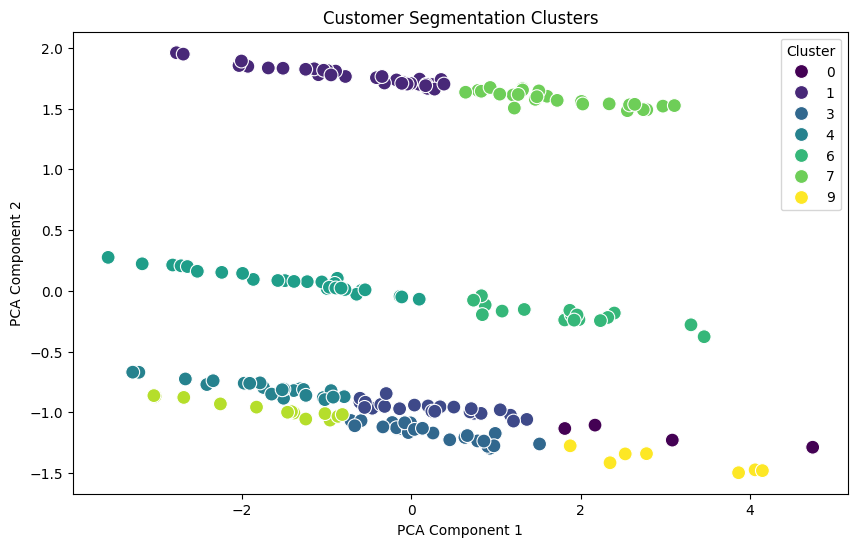

In [11]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=customer_data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


# 4. Metrics Report

In [12]:
# Report clustering metrics
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index for {optimal_clusters} Clusters: {min(db_scores):.3f}")
print("Peak Silhouette Score:", max(silhouette_scores))

Optimal Number of Clusters: 10
Davies-Bouldin Index for 10 Clusters: 0.792
Peak Silhouette Score: 0.43042314746765553


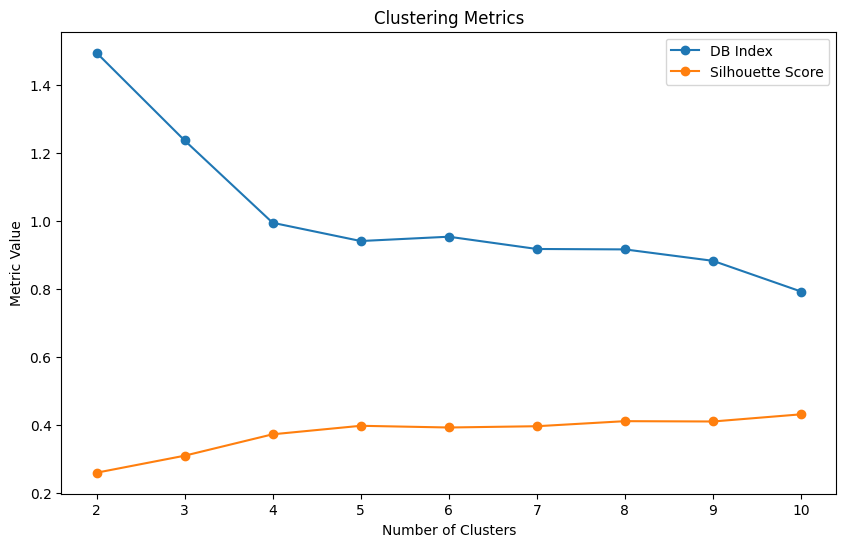

In [13]:
# Plot DB Index and Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, db_scores, marker='o', label='DB Index')
plt.plot(clusters_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Metric Value')
plt.title('Clustering Metrics')
plt.legend()
plt.show()